## GS QUANTIFY 2017 - ML

In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import random
from sklearn.decomposition import PCA

import datetime
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import boxcox

random.seed(3)

# Imports for better visualization
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

## Understanding the Data

In [2]:
# Importing the data 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape ,test.shape

((2730, 13), (1625, 5))

In [4]:
train.head()

,initialUsedMemory,initialFreeMemory,query token,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory
0,4.249634,2.999878,token_1,False,0.0,0.0,0.0,0.0,0.0,0.0,0.371230,4.409714,2.839798
1,4.409720,2.839792,token_2,False,0.0,0.0,0.0,0.0,0.0,0.0,0.220883,4.482361,2.767151
2,4.482361,2.767151,token_3,False,0.0,0.0,0.0,0.0,0.0,0.0,0.141776,4.542626,2.706886
3,4.542626,2.706886,token_4,False,0.0,0.0,0.0,0.0,0.0,0.0,0.156459,4.616293,2.633218
4,4.616296,2.633216,token_5,False,0.0,0.0,0.0,0.0,0.0,0.0,0.285218,4.787172,2.462339


In [5]:
test.head()

,initialUsedMemory,initialFreeMemory,query token,cpuTimeTaken,gcRun
0,4.247186,2.774299,token_11,0.408436,NaN
1,NaN,NaN,token_76,0.124429,NaN
2,NaN,NaN,token_53,0.245838,NaN
3,NaN,NaN,token_88,0.169346,NaN
4,NaN,NaN,token_70,0.296311,NaN


In [6]:
train.describe()

,initialUsedMemory,initialFreeMemory,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory
count,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000
mean,5.775503,1.921919,0.415684,0.291495,0.479192,0.018359,0.000535,0.002755,0.186569,5.775588,1.921990
std,0.801402,0.726219,1.619302,1.132280,1.855206,0.111837,0.007700,0.016707,0.128994,0.802645,0.728086
min,4.129662,0.330214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001052,4.117682,0.330214
25%,5.143413,1.338731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112348,5.137244,1.337994
50%,5.758096,1.961032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141588,5.758960,1.959821
75%,6.418293,2.484630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230622,6.419282,2.484630
max,7.520346,3.728506,7.583425,5.281528,8.037598,2.410000,0.260000,0.350000,0.906536,7.520346,3.749075


In [7]:
# No Missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 13 columns):
initialUsedMemory    2730 non-null float64
initialFreeMemory    2730 non-null float64
query token          2730 non-null object
gcRun                2730 non-null bool
gcInitialMemory      2730 non-null float64
gcFinalMemory        2730 non-null float64
gcTotalMemory        2730 non-null float64
userTime             2730 non-null float64
sysTime              2730 non-null float64
realTime             2730 non-null float64
cpuTimeTaken         2730 non-null float64
finalUsedMemory      2730 non-null float64
finalFreeMemory      2730 non-null float64
dtypes: bool(1), float64(11), object(1)
memory usage: 258.7+ KB


In [8]:
train.gcRun.value_counts()

False    2559
True      171
Name: gcRun, dtype: int64

## EDA

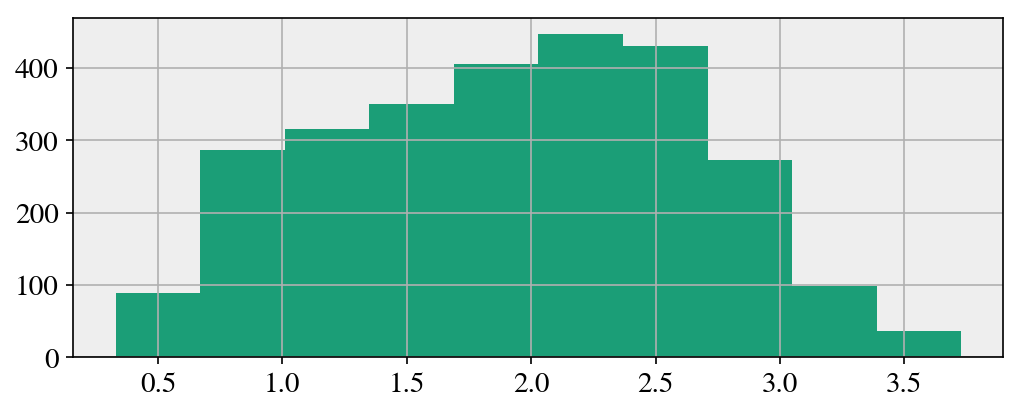

In [9]:
plt.hist(train['initialFreeMemory'])
plt.show()

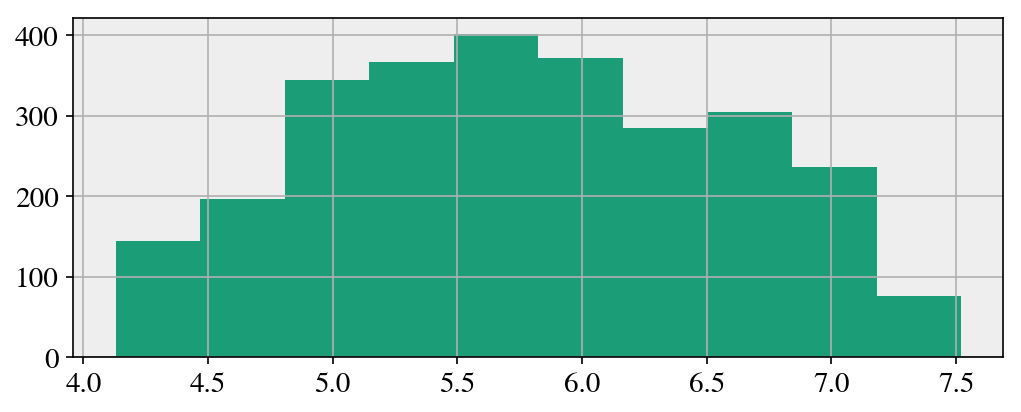

In [10]:
plt.hist(train['initialUsedMemory'])
plt.show()

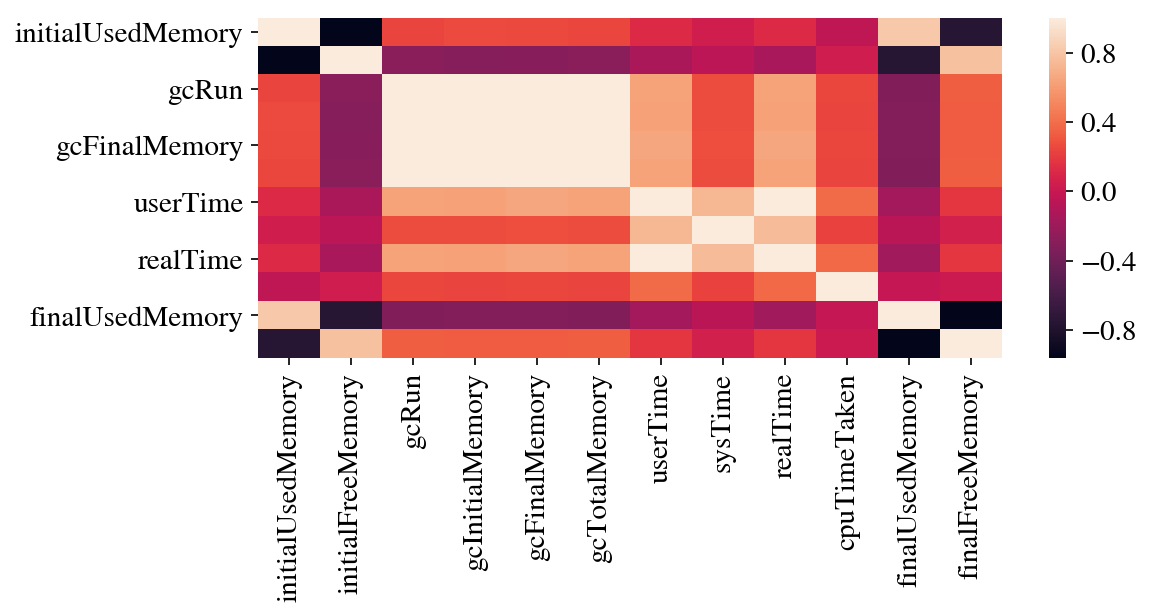

In [11]:
sns.heatmap(train.corr())

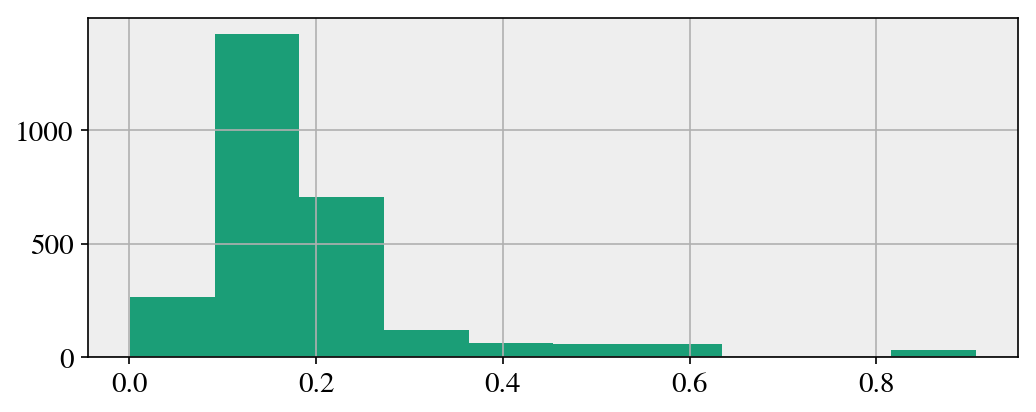

In [12]:
plt.hist(train['cpuTimeTaken'])
plt.show()

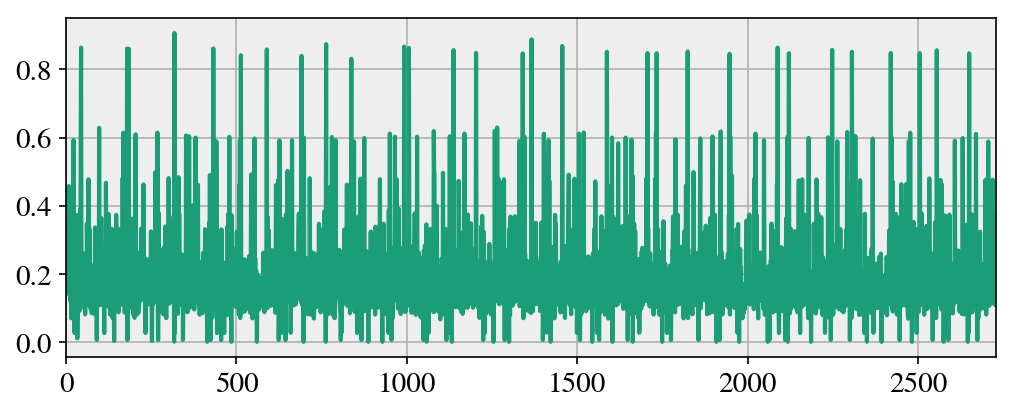

In [13]:
sns.tsplot(train['cpuTimeTaken'])
plt.show()

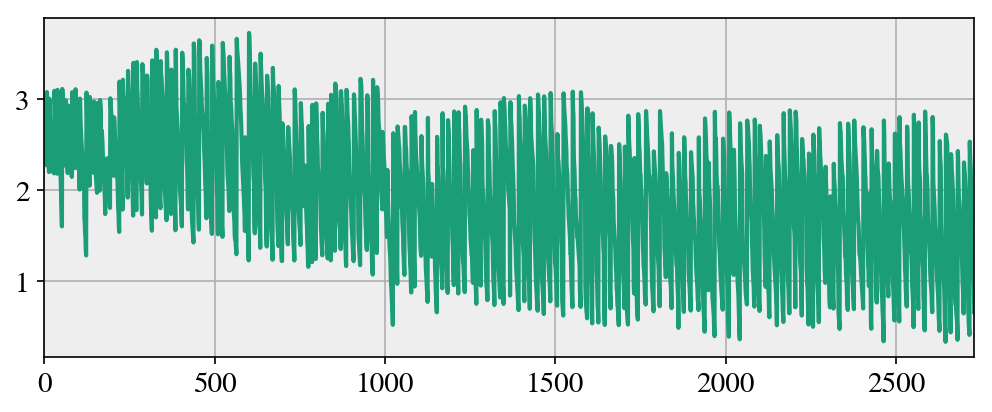

In [14]:
sns.tsplot(train['initialFreeMemory'])

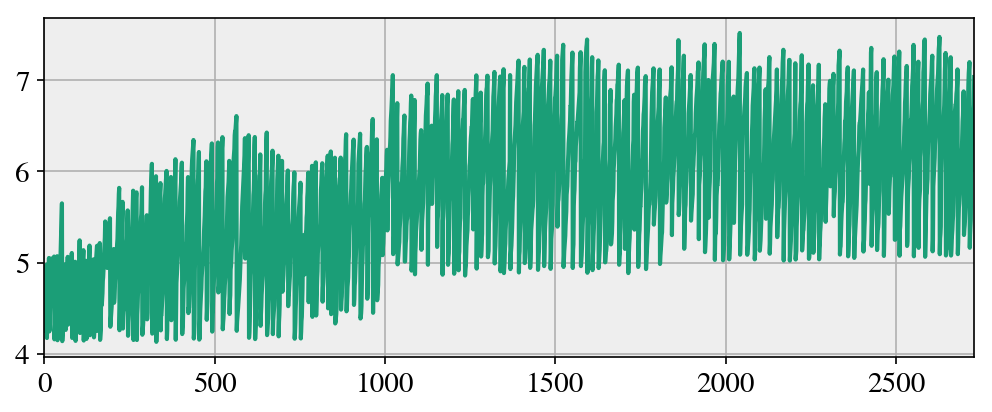

In [15]:
sns.tsplot(train['initialUsedMemory'])

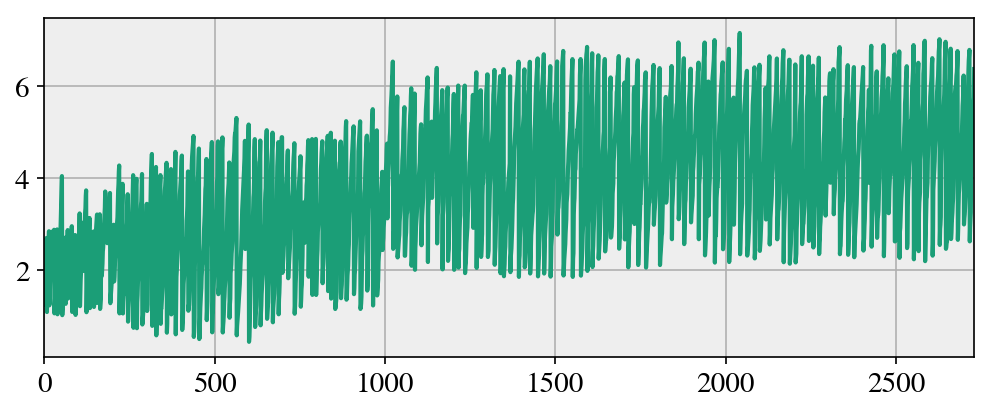

In [16]:
sns.tsplot(train['initialUsedMemory']-train['initialFreeMemory'])

In [17]:
train['query token'].value_counts()

token_30    30
token_60    30
token_62    30
token_63    30
token_64    30
token_65    30
token_66    30
token_67    30
token_68    30
token_69    30
token_9     30
token_8     30
token_1     30
token_3     30
token_2     30
token_5     30
token_4     30
token_7     30
token_6     30
token_73    30
token_72    30
token_61    30
token_90    30
token_70    30
token_91    30
token_89    30
token_82    30
token_83    30
token_80    30
token_81    30
            ..
token_37    30
token_36    30
token_35    30
token_34    30
token_33    30
token_32    30
token_57    30
token_55    30
token_76    30
token_52    30
token_75    30
token_74    30
token_79    30
token_78    30
token_46    30
token_47    30
token_44    30
token_45    30
token_42    30
token_43    30
token_40    30
token_41    30
token_48    30
token_49    30
token_59    30
token_58    30
token_51    30
token_50    30
token_53    30
token_88    30
Name: query token, Length: 91, dtype: int64

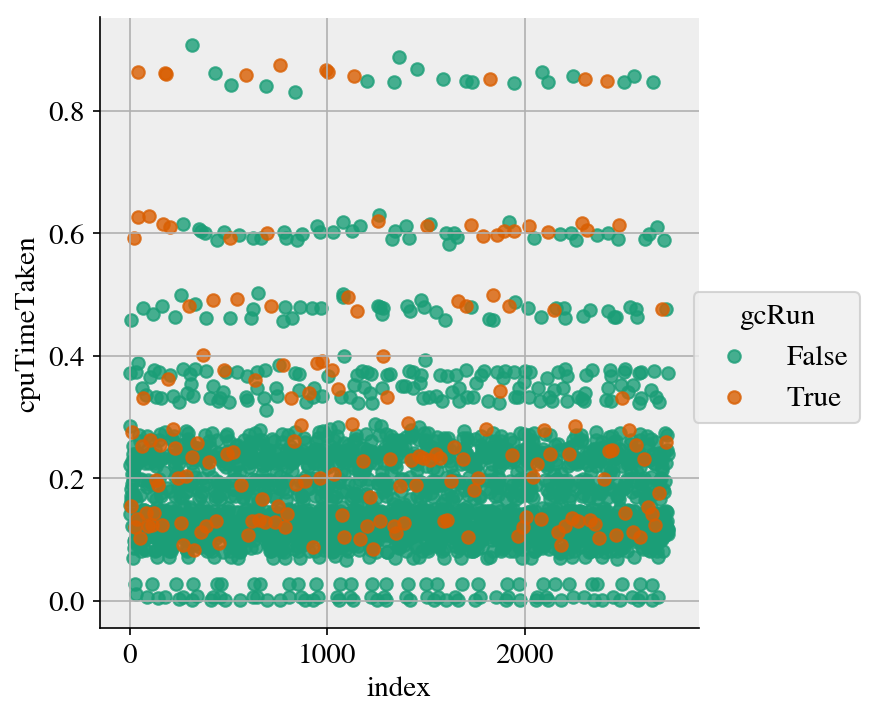

In [18]:
train['index']=train.index
sns.lmplot('index','cpuTimeTaken',data=train,hue='gcRun',fit_reg=False)
plt.show()

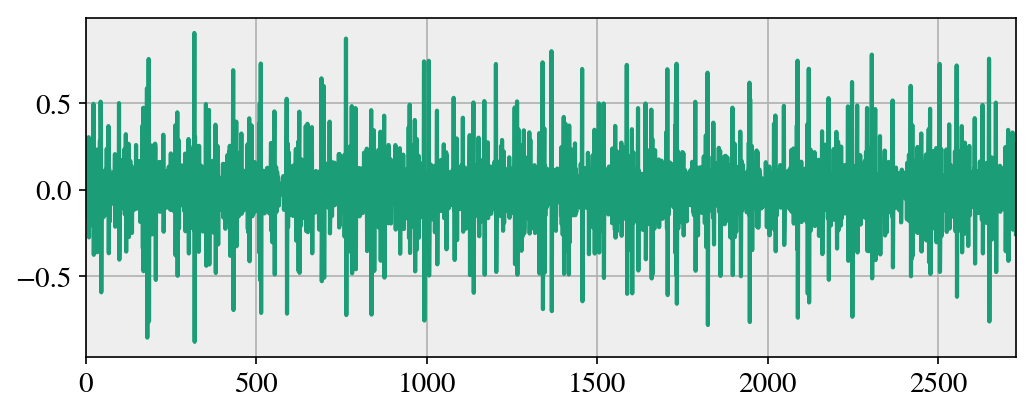

In [19]:
sns.tsplot(train['cpuTimeTaken']-train['cpuTimeTaken'].shift(1))

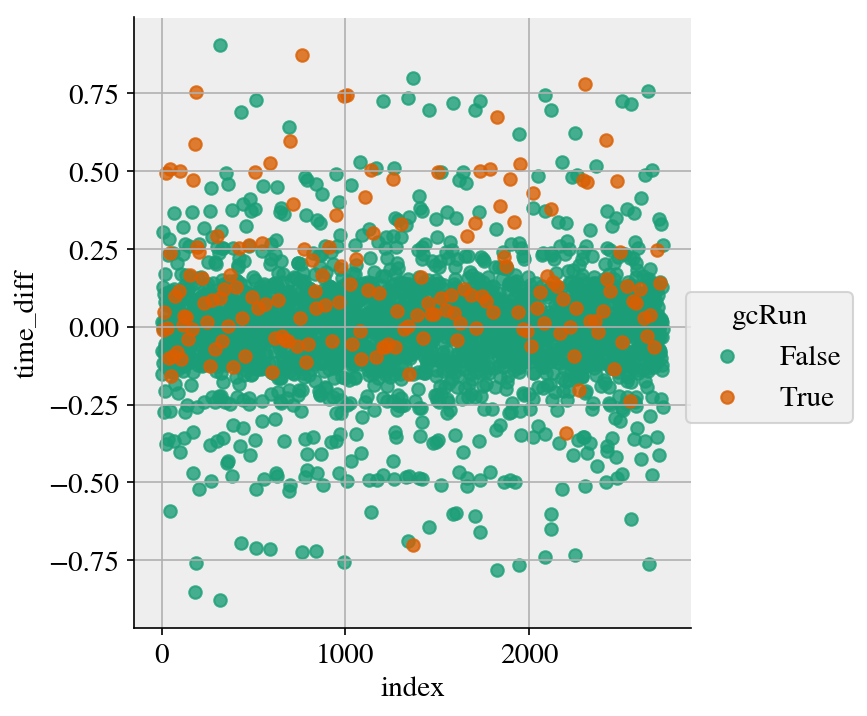

In [20]:
train['time_diff']=train['cpuTimeTaken']-train['cpuTimeTaken'].shift(1)
sns.lmplot('index','time_diff',data=train,hue='gcRun',fit_reg=False)

In [21]:
train['diff'] = train.finalUsedMemory - train.initialUsedMemory
token = train.groupby('query token')['diff'].aggregate(np.median).reset_index()

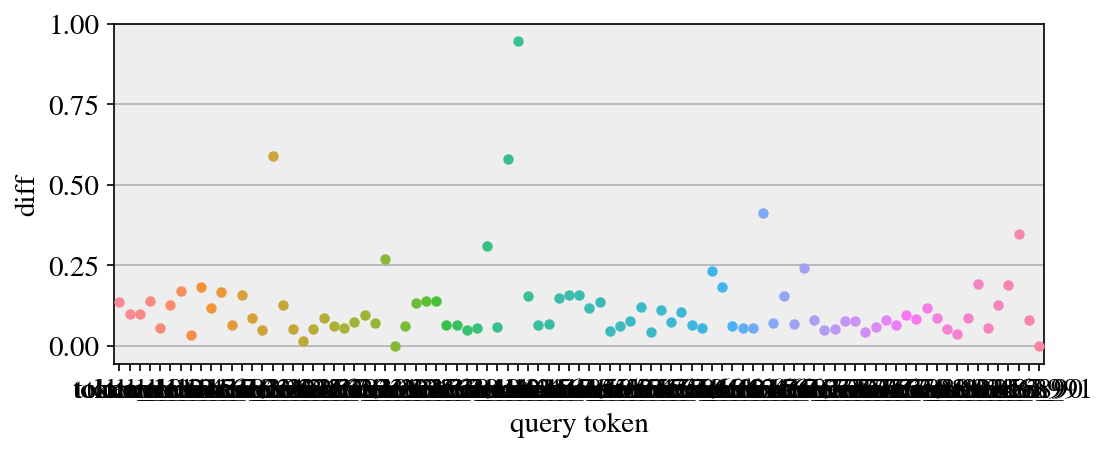

In [22]:
sns.stripplot(x="query token", y="diff", data=token)
plt.show()

## Feature engineering

In [23]:
# A New feature was created which resembles memory consumption for each token
# difference between finalUsedMemory - initialUsedMemory
# For each token we have calculated the median of memory consumption

token = train.groupby('query token')['diff'].aggregate(np.median).reset_index()
token

,query token,diff
0,token_1,0.136155
1,token_10,0.097500
2,token_11,0.098815
3,token_12,0.139854
4,token_13,0.056166
5,token_14,0.128220
6,token_15,0.169569
7,token_16,0.032967
8,token_17,0.183030
9,token_18,0.117396


In [24]:
train.columns

Index([u'initialUsedMemory', u'initialFreeMemory', u'query token', u'gcRun',
       u'gcInitialMemory', u'gcFinalMemory', u'gcTotalMemory', u'userTime',
       u'sysTime', u'realTime', u'cpuTimeTaken', u'finalUsedMemory',
       u'finalFreeMemory', u'index', u'time_diff', u'diff'],
      dtype='object')

In [25]:
train.drop(['diff'], axis=1, inplace=True)

In [26]:
# Merged the training data & testing data with token wise memory consumption 
train = pd.merge(train, token, how = 'left', on = 'query token')
test = pd.merge(test, token, how = 'left', on = 'query token')
train

,initialUsedMemory,initialFreeMemory,query token,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory,index,time_diff,diff
0,4.249634,2.999878,token_1,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.371230,4.409714,2.839798,0,NaN,0.136155
1,4.409720,2.839792,token_2,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.220883,4.482361,2.767151,1,-0.150347,0.063347
2,4.482361,2.767151,token_3,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.141776,4.542626,2.706886,2,-0.079107,0.055496
3,4.542626,2.706886,token_4,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.156459,4.616293,2.633218,3,0.014682,0.064877
4,4.616296,2.633216,token_5,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.285218,4.787172,2.462339,4,0.128759,0.158786
5,4.787174,2.462337,token_6,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.170063,4.902623,2.346889,5,-0.115154,0.105739
6,4.902623,2.346889,token_7,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.164785,4.977153,2.272359,6,-0.005278,0.066671
7,4.977155,2.272357,token_8,True,5.055250,4.142316,7.249512,0.19,0.00,0.07,0.154474,4.168083,3.081428,7,-0.010311,0.096115
8,4.171586,3.077926,token_9,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.457611,4.520573,2.728938,8,0.303136,0.345760
9,4.523625,2.725887,token_10,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.182251,4.621179,2.628333,9,-0.275360,0.097500


In [27]:
train

,initialUsedMemory,initialFreeMemory,query token,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory,index,time_diff,diff
0,4.249634,2.999878,token_1,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.371230,4.409714,2.839798,0,NaN,0.136155
1,4.409720,2.839792,token_2,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.220883,4.482361,2.767151,1,-0.150347,0.063347
2,4.482361,2.767151,token_3,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.141776,4.542626,2.706886,2,-0.079107,0.055496
3,4.542626,2.706886,token_4,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.156459,4.616293,2.633218,3,0.014682,0.064877
4,4.616296,2.633216,token_5,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.285218,4.787172,2.462339,4,0.128759,0.158786
5,4.787174,2.462337,token_6,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.170063,4.902623,2.346889,5,-0.115154,0.105739
6,4.902623,2.346889,token_7,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.164785,4.977153,2.272359,6,-0.005278,0.066671
7,4.977155,2.272357,token_8,True,5.055250,4.142316,7.249512,0.19,0.00,0.07,0.154474,4.168083,3.081428,7,-0.010311,0.096115
8,4.171586,3.077926,token_9,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.457611,4.520573,2.728938,8,0.303136,0.345760
9,4.523625,2.725887,token_10,False,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.182251,4.621179,2.628333,9,-0.275360,0.097500


In [28]:
# To incorporate the effect of timeseries means sequencing data, we have created a new feature serial Number
train['serialNum'] = train.index + 1 
train1 = pd.DataFrame(train['serialNum'])
train1['query token'] = train['query token']
train1['cpuTimeTaken'] = train['cpuTimeTaken']
train1['diff'] = train['diff']


# train1['time_diff'] = train['cpuTimeTaken'] -train['cpuTimeTaken'].shift(1)
# train1.fillna(0, inplace=True)

# First we have to predict the initialFreeMemory using all 4 variables
ytrain = train['initialFreeMemory']

train1

,serialNum,query token,cpuTimeTaken,diff
0,1,token_1,0.371230,0.136155
1,2,token_2,0.220883,0.063347
2,3,token_3,0.141776,0.055496
3,4,token_4,0.156459,0.064877
4,5,token_5,0.285218,0.158786
5,6,token_6,0.170063,0.105739
6,7,token_7,0.164785,0.066671
7,8,token_8,0.154474,0.096115
8,9,token_9,0.457611,0.345760
9,10,token_10,0.182251,0.097500


In [29]:
test1 = pd.DataFrame()
test1['serialNum'] = test.index + 1 
test1['query token'] = test['query token']
test1['cpuTimeTaken'] = test['cpuTimeTaken']
# test1['time_diff'] = test['cpuTimeTaken'] -test['cpuTimeTaken'].shift(1)
# test1.fillna(0, inplace=True)
test1['diff'] = test['diff']

# test1.drop(['initialUsedMemory','initialFreeMemory','gcRun'], axis=1, inplace=True)
test1

,serialNum,query token,cpuTimeTaken,diff
0,1,token_11,0.408436,0.098815
1,2,token_76,0.124429,0.043842
2,3,token_53,0.245838,0.046274
3,4,token_88,0.169346,0.125772
4,5,token_70,0.296311,0.240183
5,6,token_26,0.025018,0.014006
6,7,token_4,0.121191,0.064877
7,8,token_49,0.220577,0.149634
8,9,token_75,0.133468,0.077465
9,10,token_31,0.151191,0.094756


In [30]:
# Encoded the token text column into numerical data in each train and test data
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder() 

train1['query token'] = l.fit_transform(train1['query token'])
test1['query token'] = l.fit_transform(test1['query token'])

train1

,serialNum,query token,cpuTimeTaken,diff
0,1,0,0.371230,0.136155
1,2,11,0.220883,0.063347
2,3,22,0.141776,0.055496
3,4,33,0.156459,0.064877
4,5,44,0.285218,0.158786
5,6,55,0.170063,0.105739
6,7,66,0.164785,0.066671
7,8,77,0.154474,0.096115
8,9,88,0.457611,0.345760
9,10,1,0.182251,0.097500


In [31]:
# from sklearn.ensemble import RandomForestRegressor
# xgb = RandomForestRegressor(max_depth=2, random_state=0)
# xgb.fit(train1,ytrain)

In [32]:
# Applying Linear regression model to predict the initial free memory from training data
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

lr = LinearRegression(normalize = 1)

In [33]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( train1, ytrain, test_size=.3, random_state=100 )
lr.fit(Xtrain, Ytrain )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=1)

In [34]:
print ("Training :"+str((mean_squared_error( Ytrain, lr.predict(Xtrain)))**.5))
print ("Test :"+str(mean_squared_error( Ytest, lr.predict(Xtest))**.5))

Training :0.642884757819
Test :0.632145545832


In [35]:
# Training on whole data
lr.fit(train1,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=1)

In [36]:
# Predict the initial free memory on test data
submission = pd.DataFrame()
submission['serialNum'] = test.index + 1
submission['initialFreeMemory'] = lr.predict(test1)
submission

,serialNum,initialFreeMemory
0,1,2.450787
1,2,2.515395
2,3,2.484566
3,4,2.547107
4,5,2.556756
5,6,2.469870
6,7,2.488720
7,8,2.514287
8,9,2.521605
9,10,2.487157


## Classification Model for estimating gcRun

In [37]:
# Created a new feature for estimating the CPU time taken for each row
train1['initialFreeMemory'] = train['initialFreeMemory']
train1['time_diff'] = train['cpuTimeTaken'] -train['cpuTimeTaken'].shift(1)
# train1['IFM_moving_av5'] = train.initialFreeMemory.rolling(window=5).mean()
train1.fillna(0, inplace=True)

# Y Label changed to Garbage Collector Run
ytrain = train.gcRun
train1 

,serialNum,query token,cpuTimeTaken,diff,initialFreeMemory,time_diff
0,1,0,0.371230,0.136155,2.999878,0.000000
1,2,11,0.220883,0.063347,2.839792,-0.150347
2,3,22,0.141776,0.055496,2.767151,-0.079107
3,4,33,0.156459,0.064877,2.706886,0.014682
4,5,44,0.285218,0.158786,2.633216,0.128759
5,6,55,0.170063,0.105739,2.462337,-0.115154
6,7,66,0.164785,0.066671,2.346889,-0.005278
7,8,77,0.154474,0.096115,2.272357,-0.010311
8,9,88,0.457611,0.345760,3.077926,0.303136
9,10,1,0.182251,0.097500,2.725887,-0.275360


In [38]:
test1['initialFreeMemory'] = submission.initialFreeMemory
test1['time_diff'] = test['cpuTimeTaken'] -test['cpuTimeTaken'].shift(1)
# test1['IFM_moving_av5'] = test1.initialFreeMemory.rolling(window=5).mean()
test1.fillna(0, inplace=True)
test1

,serialNum,query token,cpuTimeTaken,diff,initialFreeMemory,time_diff
0,1,2,0.408436,0.098815,2.450787,0.000000
1,2,73,0.124429,0.043842,2.515395,-0.284007
2,3,48,0.245838,0.046274,2.484566,0.121409
3,4,86,0.169346,0.125772,2.547107,-0.076492
4,5,67,0.296311,0.240183,2.556756,0.126965
5,6,18,0.025018,0.014006,2.469870,-0.271293
6,7,33,0.121191,0.064877,2.488720,0.096173
7,8,43,0.220577,0.149634,2.514287,0.099386
8,9,72,0.133468,0.077465,2.521605,-0.087109
9,10,24,0.151191,0.094756,2.487157,0.017724


In [39]:
# Applying Logistic regression model to predict the gc Run from training data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn import tree
from sklearn.metrics import roc_curve, auc

logr = LogisticRegression()
Xtrain, Xtest, Ytrain, Ytest = train_test_split( train1, ytrain, test_size=.3, random_state=100, stratify=ytrain)

In [40]:
logr.fit(Xtrain, Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in range(0, fpr.shape[0],labe):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

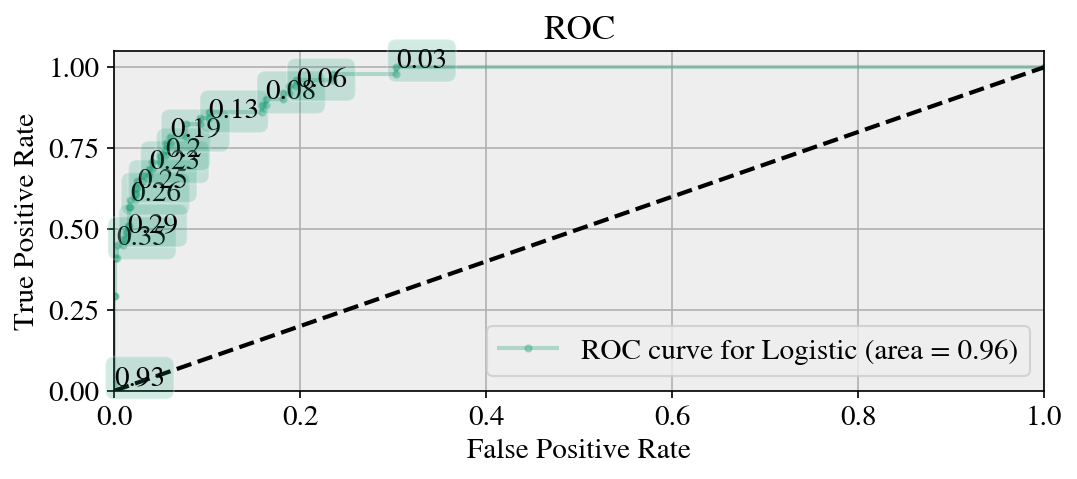

In [42]:
make_roc("Logistic",logr, Ytest, Xtest, None, labe=5)

In [43]:
print ("Training :"+str(accuracy_score( Ytrain, logr.predict(Xtrain))))
print ("Test :"+str(accuracy_score( Ytest, logr.predict(Xtest))))
print ("ROC_AUC :"+str(roc_auc_score( Ytest, logr.predict(Xtest))))
print ("precision_score :"+str(precision_score( Ytest, logr.predict(Xtest))))
print ("recall_score :"+str(recall_score( Ytest, logr.predict(Xtest))))
print ("confusion_matrix :"+ str(confusion_matrix(Ytest, logr.predict(Xtest))))

Training :0.947148090005
Test :0.956043956044
ROC_AUC :0.647058823529
precision_score :1.0
recall_score :0.294117647059
confusion_matrix :[[768   0]
 [ 36  15]]


In [44]:
def myscorer(cm):
    False1 = cm[0][1]
    False2 = cm[1][0]
    return (1*False1) + (3*False2), (False1+False2)

print ("myscorer :"+ str(myscorer(confusion_matrix(Ytest, logr.predict(Xtest)))))

myscorer :(108, 36)


In [45]:
# Training on whole data
logr.fit(train1,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
submission['gcRun_prob'] = logr.predict_proba(test1)[:,1]
submission['gcRun'] = True
submission['gcRun'][submission['gcRun_prob'] < 0.0225] = False
submission.head(5)

,serialNum,initialFreeMemory,gcRun_prob,gcRun
0,1,2.450787,0.035007,True
1,2,2.515395,0.009091,False
2,3,2.484566,0.025237,True
3,4,2.547107,0.015872,False
4,5,2.556756,0.035869,True


In [47]:
submission.drop(['gcRun_prob'], axis=1, inplace=True)

In [48]:
submission.gcRun.value_counts()

False    1407
True      218
Name: gcRun, dtype: int64

In [50]:
submission.to_csv("sub01.csv",index=False)